In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.mplot3d import Axes3D

In [69]:
# Data user modelling dataset Hamdi Tolga Kahraman
# https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling
# has 4 'clusters' (very_low, low, middle, high)
# has 5 dimensions/attributes, but we only use the 3 most different ones
# ie., the one with the smallest correlation
df=pd.read_csv('datauser.csv', sep=',',header=0)
df.head()

,STG,STR,LPR
0,0.08,0.10,0.24
1,0.06,0.05,0.25
2,0.10,0.15,0.65
3,0.08,0.08,0.98
4,0.09,0.40,0.10


In [70]:
x = np.array(df)

In [71]:
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x[:,0], x[:,1], x[:,2], c='r', marker='o')
#plt.show()

In [72]:
# stop KMM if either J<=j_thresh or iteration>=max_loop
j_thresh = 0.01 # J threshold to stop iterating
max_loop = 50 # max iteration
n_cluster = 4 # nbr of cluster

[[ 0.08  0.1   0.24]
 [ 0.06  0.05  0.25]
 [ 0.1   0.15  0.65]
 [ 0.08  0.08  0.98]]


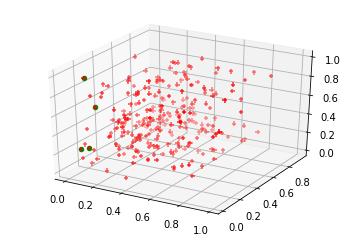

In [73]:
# plot initialization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# pick random starting point
# in this case, just pick the first 'n' points as initial center
center = x[0:n_cluster,:]
for i in range(0,n_cluster):
    ax.scatter(center[i,0], x[i,1], x[i,2], c='g', marker='o')
print center
# plot the center to verify
ax.scatter(x[:,0], x[:,1], x[:,2], c='r', marker='+')
plt.show()

In [74]:
print np.tile(x[0], (3, 1))
print np.square(np.linalg.norm(np.tile(x[0],(4,1)) - center))

[[ 0.08  0.1   0.24]
 [ 0.08  0.1   0.24]
 [ 0.08  0.1   0.24]]
0.722


In [75]:
xyz = np.empty([4,0])
if 'xyz[0]' in locals():
    xyz[0] = np.array([1,2,3])
#xyz[0].append(xyz[0],np.array([1,1,2]))
#xyz = np.append(xyz[0],np.array([2,1,2]))
#xyz = np.append(xyz[0],np.array([3,1,2]))
print xyz

[]


In [76]:
# calculate distance of x to each point in y
def calcDist(x,y):
    retval = np.array([])
    for i in y:
        retval = np.append(retval,np.array([np.linalg.norm(i - x)]))
    return retval

loop = 48
curJ = j_thresh + 1 # just to make sure the loop runs at least once
while (loop<=max_loop) and (curJ >= j_thresh):
    cluster = np.empty((n_cluster,x.shape[0],3), float) # each points will be assigned to each cluster
    nbrelem = np.zeros(n_cluster, dtype=np.int) # initially each cluster is blank
    for n in x:
        # the distance of this point to center of each cluster
        distance = calcDist(n,center)
        cgroup = distance.argmin()
        z = nbrelem[cgroup]
        cluster[cgroup,z] = n
        nbrelem[cgroup] += 1
        print cluster
    print loop
    loop += 1


[[[  8.00000000e-002   1.00000000e-001   2.40000000e-001]
  [  4.14459338e-316   8.22865375e+044   7.56970076e+173]
  [  1.26208172e+122   1.06561701e-255   1.37163403e-309]
  ..., 
  [ -6.35482560e-059  -9.59530424e-045   2.46434503e+284]
  [ -5.56859077e+274  -1.58429167e-131  -6.66632379e+252]
  [ -3.38989603e-134  -2.32359664e-155   3.88712465e-235]]

 [[ -9.10978305e-070  -3.17172799e-045   4.02868330e-201]
  [ -4.82022314e-269  -1.10761582e-235  -2.76003428e+084]
  [  2.13490388e-110  -1.66733551e-234  -4.56220877e+028]
  ..., 
  [  2.25679600e-188   3.01757662e+007   2.74316554e+120]
  [ -2.41908422e+234   1.69674800e+086  -4.10374312e+181]
  [  3.59334770e+096  -4.65330177e+129  -1.13640979e+066]]

 [[  9.08745983e+229  -5.79954091e-244  -1.82447341e-034]
  [  5.82473952e+243  -3.98399414e+262  -7.90753778e+283]
  [  2.30827284e+232  -3.93679736e+117   1.42581375e-105]
  ..., 
  [  1.61446386e+273  -1.95169854e+261  -6.52420725e+107]
  [  3.47290434e+306   9.10732272e-122   2.6

[[[  8.00000000e-002   1.00000000e-001   2.40000000e-001]
  [  9.00000000e-002   4.00000000e-001   1.00000000e-001]
  [  1.00000000e-001   4.30000000e-001   2.90000000e-001]
  ..., 
  [ -6.35482560e-059  -9.59530424e-045   2.46434503e+284]
  [ -5.56859077e+274  -1.58429167e-131  -6.66632379e+252]
  [ -3.38989603e-134  -2.32359664e-155   3.88712465e-235]]

 [[  6.00000000e-002   5.00000000e-002   2.50000000e-001]
  [  9.00000000e-002   2.00000000e-002   1.80000000e-001]
  [  2.13490388e-110  -1.66733551e-234  -4.56220877e+028]
  ..., 
  [  2.25679600e-188   3.01757662e+007   2.74316554e+120]
  [ -2.41908422e+234   1.69674800e+086  -4.10374312e+181]
  [  3.59334770e+096  -4.65330177e+129  -1.13640979e+066]]

 [[  1.00000000e-001   1.50000000e-001   6.50000000e-001]
  [  2.00000000e-001   3.50000000e-001   7.20000000e-001]
  [  6.00000000e-002   5.10000000e-001   4.10000000e-001]
  ..., 
  [  1.61446386e+273  -1.95169854e+261  -6.52420725e+107]
  [  3.47290434e+306   9.10732272e-122   2.6

[[[  8.00000000e-002   1.00000000e-001   2.40000000e-001]
  [  9.00000000e-002   4.00000000e-001   1.00000000e-001]
  [  1.00000000e-001   4.30000000e-001   2.90000000e-001]
  ..., 
  [  1.14587773e-312   6.79038653e-313   1.01855798e-312]
  [  1.18831764e-312   6.79038653e-313   2.12199580e-313]
  [  1.93101617e-312   1.01855798e-312   1.06099790e-312]]

 [[  6.00000000e-002   5.00000000e-002   2.50000000e-001]
  [  9.00000000e-002   2.00000000e-002   1.80000000e-001]
  [  1.01855798e-312   6.79038653e-313   2.12199580e-313]
  ..., 
  [  1.14587773e-312   6.79038653e-313   2.12199580e-313]
  [  1.93101617e-312   1.01855798e-312   1.06099790e-312]
  [  1.12465777e-312   6.79038653e-313   9.76118064e-313]]

 [[  1.00000000e-001   1.50000000e-001   6.50000000e-001]
  [  2.00000000e-001   3.50000000e-001   7.20000000e-001]
  [  6.00000000e-002   5.10000000e-001   4.10000000e-001]
  ..., 
  [  1.93101617e-312   1.01855798e-312   1.10343781e-312]
  [  6.79038653e-313   6.79038653e-313   9.7

[[[  8.00000000e-002   1.00000000e-001   2.40000000e-001]
  [  9.00000000e-002   4.00000000e-001   1.00000000e-001]
  [  1.00000000e-001   4.30000000e-001   2.90000000e-001]
  ..., 
  [  1.14587773e-312   6.79038653e-313   1.01855798e-312]
  [  1.18831764e-312   6.79038653e-313   2.12199580e-313]
  [  1.93101617e-312   1.01855798e-312   1.06099790e-312]]

 [[  6.00000000e-002   5.00000000e-002   2.50000000e-001]
  [  9.00000000e-002   2.00000000e-002   1.80000000e-001]
  [  1.01855798e-312   6.79038653e-313   2.12199580e-313]
  ..., 
  [  1.14587773e-312   6.79038653e-313   2.12199580e-313]
  [  1.93101617e-312   1.01855798e-312   1.06099790e-312]
  [  1.12465777e-312   6.79038653e-313   9.76118064e-313]]

 [[  1.00000000e-001   1.50000000e-001   6.50000000e-001]
  [  2.00000000e-001   3.50000000e-001   7.20000000e-001]
  [  6.00000000e-002   5.10000000e-001   4.10000000e-001]
  ..., 
  [  1.93101617e-312   1.01855798e-312   1.10343781e-312]
  [  6.79038653e-313   6.79038653e-313   9.7

[[[  8.00000000e-002   1.00000000e-001   2.40000000e-001]
  [  9.00000000e-002   4.00000000e-001   1.00000000e-001]
  [  1.00000000e-001   4.30000000e-001   2.90000000e-001]
  ..., 
  [ -6.35482560e-059  -9.59530424e-045   2.46434503e+284]
  [ -5.56859077e+274  -1.58429167e-131  -6.66632379e+252]
  [ -3.38989603e-134  -2.32359664e-155   3.88712465e-235]]

 [[  6.00000000e-002   5.00000000e-002   2.50000000e-001]
  [  9.00000000e-002   2.00000000e-002   1.80000000e-001]
  [  2.13490388e-110  -1.66733551e-234  -4.56220877e+028]
  ..., 
  [  2.25679600e-188   3.01757662e+007   2.74316554e+120]
  [ -2.41908422e+234   1.69674800e+086  -4.10374312e+181]
  [  3.59334770e+096  -4.65330177e+129  -1.13640979e+066]]

 [[  1.00000000e-001   1.50000000e-001   6.50000000e-001]
  [  2.00000000e-001   3.50000000e-001   7.20000000e-001]
  [  6.00000000e-002   5.10000000e-001   4.10000000e-001]
  ..., 
  [  1.61446386e+273  -1.95169854e+261  -6.52420725e+107]
  [  3.47290434e+306   9.10732272e-122   2.6

In [79]:
while (n<=max_n) or (curJ >= j_thresh):
    print n
    n = n+1
    
for it in range(0, maxIter):
    # Step1: minimize J with respect to Rnk, keeping Uk fixed
    for n in range(0, X.shape[0]):
        x = X[n,:]
        # calculate the distance to each center
        dist_c0 = np.square(np.linalg.norm(x - C0))
        dist_c1 = np.square(np.linalg.norm(x - C1))
        dist_c2 = np.square(np.linalg.norm(x - C2))
        # erase old Rnk
        cluster[n,:] = [0,0,0]
        # update Rnk
        min_dist = min(dist_c0, dist_c1, dist_c2)
        if (dist_c0 == min_dist):
            cluster[n,0] = 1
        elif (dist_c1 == min_dist):
            cluster[n,1] = 1
        elif (dist_c2 == min_dist):
            cluster[n,2] = 1
    # Step2: minimize J with respect to Uk, keeping Rnk fixed
    sum_c0 = np.array([0,0,0,0], dtype = np.float64)
    sum_c1 = np.array([0,0,0,0], dtype = np.float64)
    sum_c2 = np.array([0,0,0,0], dtype = np.float64)
    for n in range(0, X.shape[0]):
        if (cluster[n,0] == 1):
            sum_c0 += X[n,:]
        elif (cluster[n,1] == 1):
            sum_c1 += X[n,:]
        elif (cluster[n,2] == 1):
            sum_c2 += X[n,:]
    new_C0 = sum_c0 / np.sum(cluster[:,0])
    new_C1 = sum_c1 / np.sum(cluster[:,1])
    new_C2 = sum_c2 / np.sum(cluster[:,2])
    
    if (np.sum(np.square(new_C0 - C0)) + np.sum(np.square(new_C1 - C1)) + np.sum(np.square(new_C2 - C2)) < 0.01):
        break
        
    C0 = new_C0
    C1 = new_C1
    C2 = new_C2
    
    print (it, ': ')
    print ('C0 = ', C0)
    print ('C1 = ', C1)
    print ('C2 = ', C2)
    print ('cluster[0] = ', cluster[0,:])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()